In [98]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
cur_path = r'C:\Users\user\Desktop\Traffic_Sign_Recognition'


In [99]:
dir_path = r'C:\Users\user\Desktop\Traffic_Sign_Recognition'
train_path = r'C:\Users\user\Desktop\Traffic_Sign_Recognition\Train'
test_path = r'C:\Users\user\Desktop\Traffic_Sign_Recognition\Test'

In [100]:
import pandas as pd
labels = pd.read_csv(r"C:\Users\user\Desktop\Traffic_Sign_Recognition\SignNames.csv")
labels.head(43)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


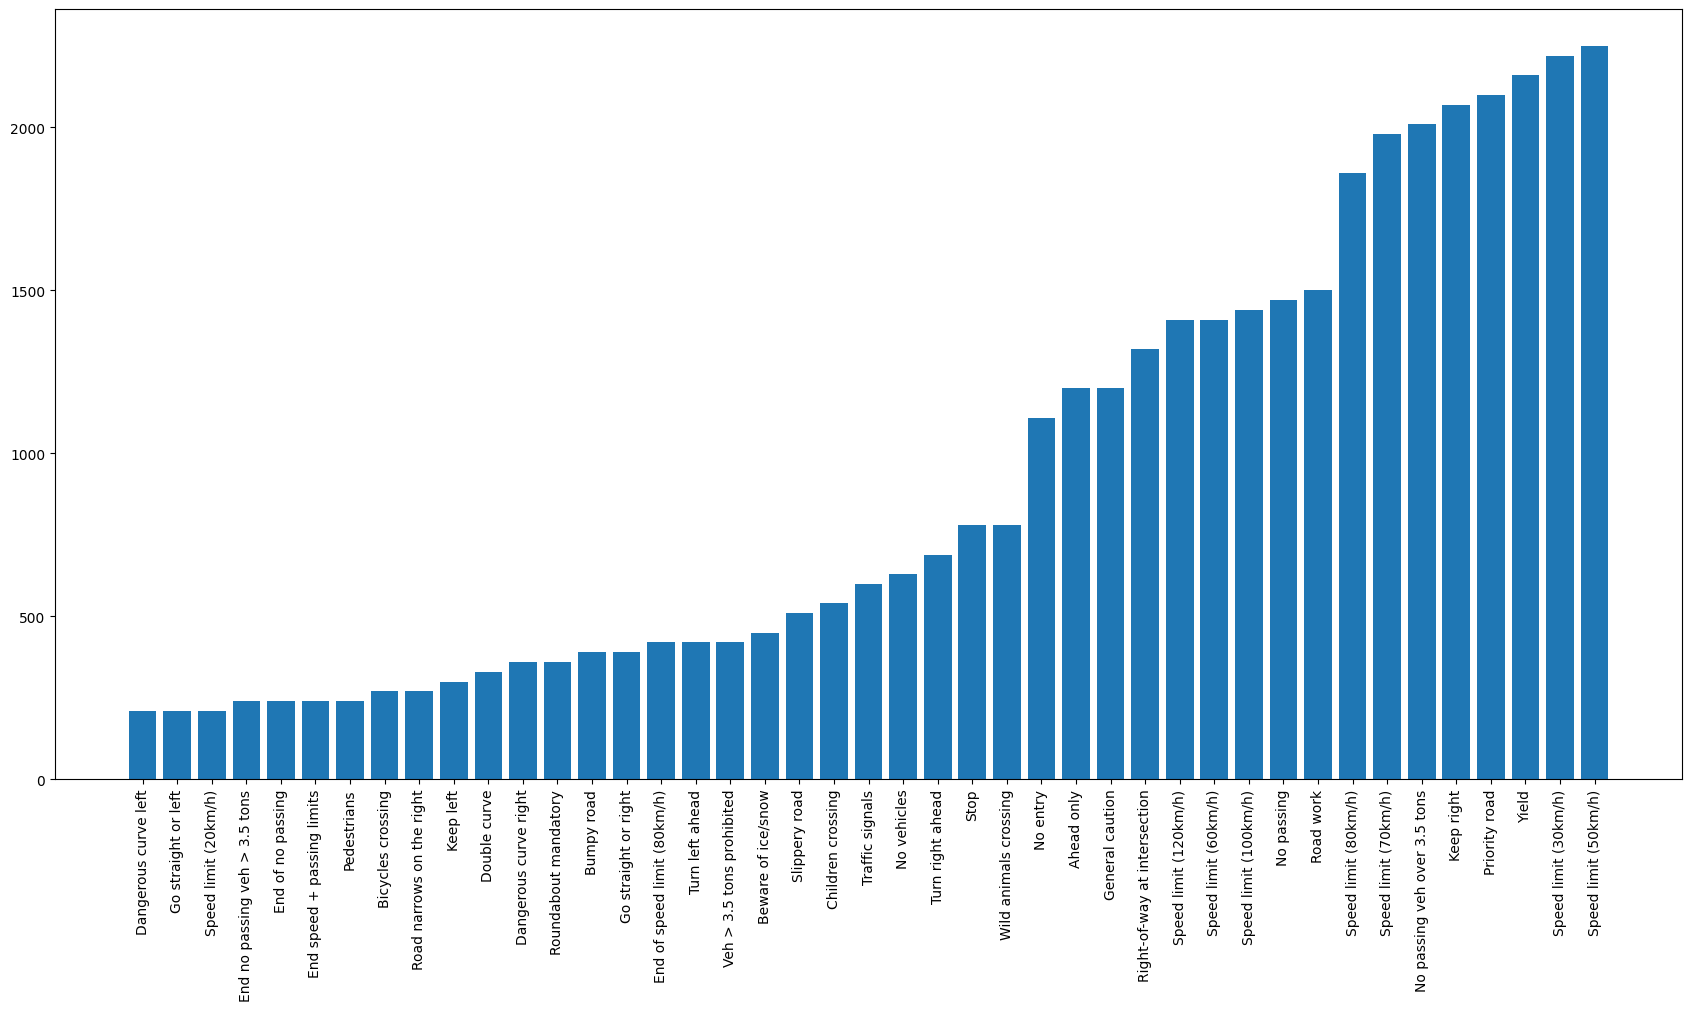

In [112]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [list(tuple) for tuple in tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21, 10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()




In [113]:
data = [] 
labels = [] 
nr_categories=43

for category in range(nr_categories):
    path = os.path.join(train_path, str(category))
    for img in os.listdir(path):
        try:
            image = Image.open(path + '\\' + img)
            image = image.resize((30, 30))
            image = np.array(image)

            data.append(image)
            labels.append(category)
        except Exception as e:
            print(e)

data = np.array(data)
labels = np.array(labels)


In [114]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [115]:

x_train, x_test, y_train, y_test = train_test_split(np.array(data), np.array(labels), test_size=0.2,  random_state=0)
print(f"Using {len(x_train)} images for training")
print(f"Using {len(x_test)} images for testing")


Using 31367 images for training
Using 7842 images for testing


In [116]:

print(x_train.shape) 
print( y_train.shape)

(31367, 30, 30, 3)
(31367,)


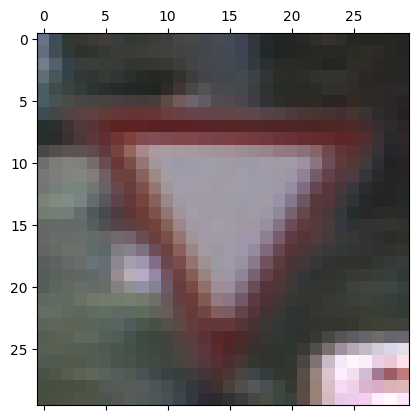

In [117]:
plt.matshow(x_train[40])


In [118]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [119]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 conv2d_25 (Conv2D)          (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 11, 11, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

In [120]:
#Compilation of the model
model.compile(optimizer='adam' ,loss='categorical_crossentropy' ,metrics=['accuracy'])

In [121]:

history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
981/981 [==============================] - 104s 104ms/step - loss: 2.1214 - accuracy: 0.4550 - val_loss: 0.6628 - val_accuracy: 0.8514
Epoch 2/30
981/981 [==============================] - 100s 102ms/step - loss: 0.8796 - accuracy: 0.7395 - val_loss: 0.3822 - val_accuracy: 0.8820
Epoch 3/30
981/981 [==============================] - 102s 104ms/step - loss: 0.6619 - accuracy: 0.7995 - val_loss: 0.3526 - val_accuracy: 0.8988
Epoch 4/30
981/981 [==============================] - 100s 102ms/step - loss: 0.5847 - accuracy: 0.8259 - val_loss: 0.2533 - val_accuracy: 0.9292
Epoch 5/30
981/981 [==============================] - 98s 100ms/step - loss: 0.5070 - accuracy: 0.8472 - val_loss: 0.2005 - val_accuracy: 0.9404
Epoch 6/30
981/981 [==============================] - 93s 95ms/step - loss: 0.4108 - accuracy: 0.8762 - val_loss: 0.1384 - val_accuracy: 0.9624
Epoch 7/30
981/981 [==============================] - 93s 95ms/step - loss: 0.3642 - accuracy: 0.8908 - val_loss: 0.1431 - val_

In [122]:
model.save("./training/TSR_F(1).h5")

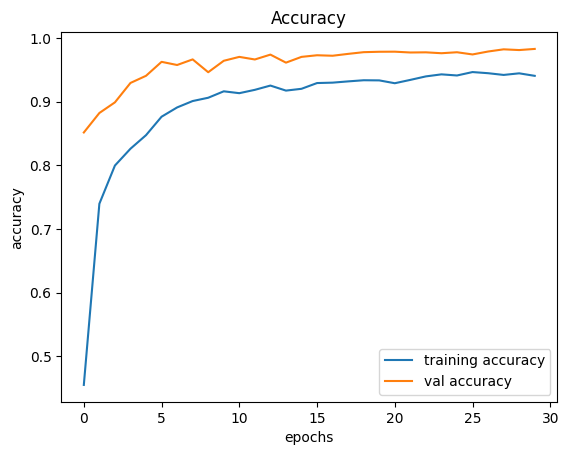

In [123]:
# accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


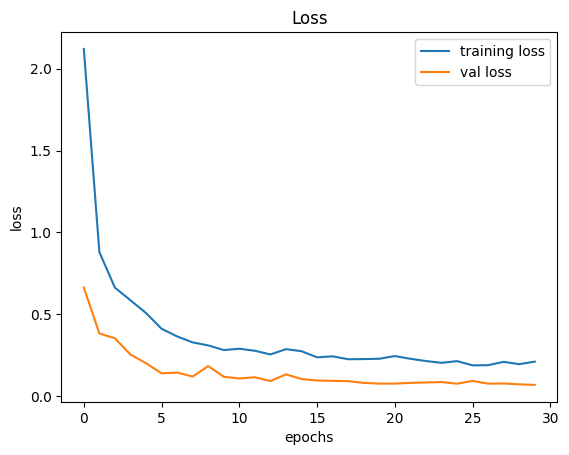

In [124]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [125]:
from sklearn.metrics import accuracy_score
import pandas as pd

y_test = pd.read_csv(r'C:\Users\user\Desktop\Traffic_Sign_Recognition\Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

pred = np.argmax(model.predict(X_test), axis=1)

print(accuracy_score(labels, pred))


395/395 [==============================] - 9s 23ms/step
0.9383214568487728


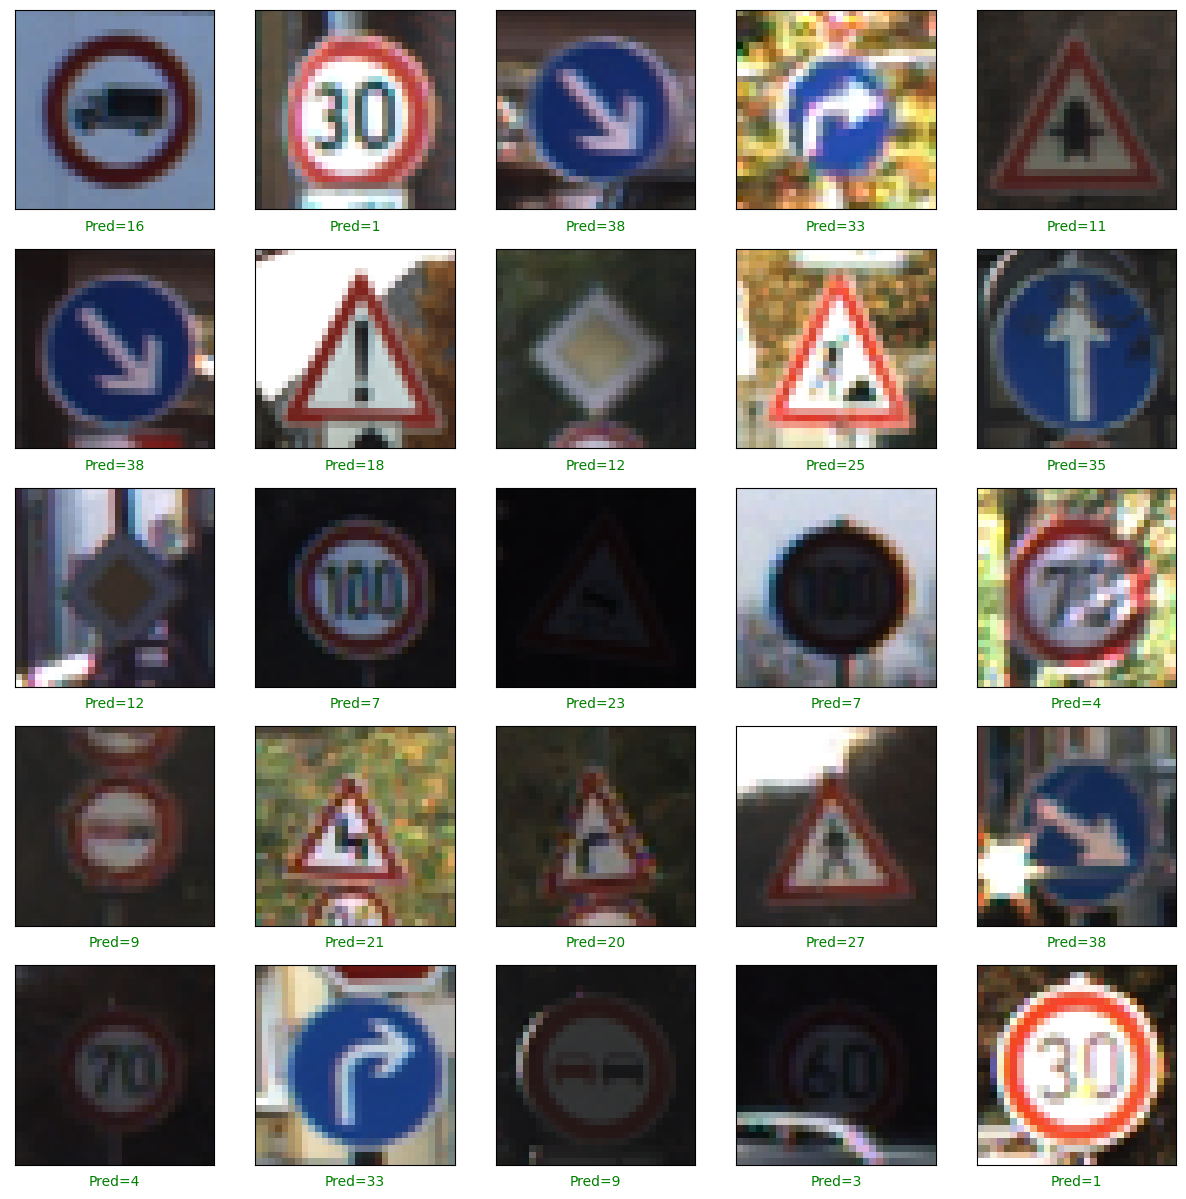

In [126]:
plt.figure(figsize=(15, 15))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    col = 'g'
    
    plt.xlabel('Pred={}'.format(prediction), color=col)
    plt.imshow(X_test[start_index + i])
plt.show()


In [127]:
from keras.models import load_model
import os
os.chdir(r'C:\Users\user\Desktop\Traffic_Sign_Recognition')
model = load_model('./training/TSR.h5')


In [129]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [130]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    x_test=np.array(data)
    y_pred = model.predict(x_test)
    classes_x = np.argmax(y_pred, axis=1)
    return image,classes_x

1/1 [==============================] - 0s 119ms/step
Predicted traffic sign is:  Speed limit (30km/h)


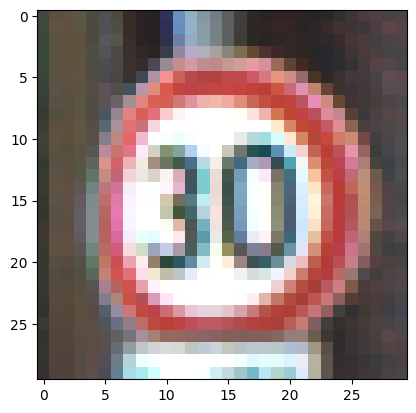

In [131]:
plot, prediction = test_on_img(r'C:\Users\user\Desktop\Traffic_Sign_Recognition\Test\00001.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()


1/1 [==============================] - 0s 9ms/step
Predicted traffic sign is:  Yield


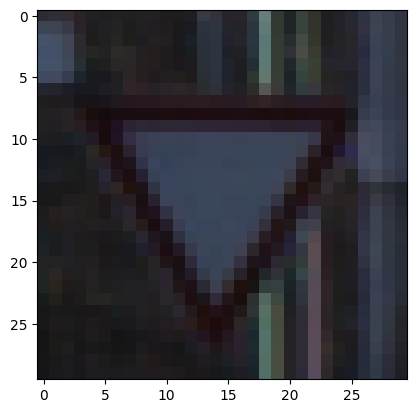

In [132]:
plot, prediction = test_on_img(
    r'C:\Users\user\Desktop\Traffic_Sign_Recognition\Test\01581.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()


1/1 [==============================] - 0s 30ms/step
Predicted traffic sign is:  Ahead only


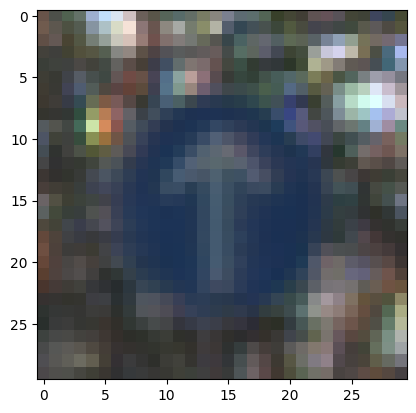

In [135]:
plot, prediction = test_on_img(
    r'C:\Users\user\Desktop\Traffic_Sign_Recognition\Test\00471.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()
